In [1]:
#!pip install geopandas==0.3.0
#!pip install pyshp==1.2.10
#!pip install shapely==1.6.3

# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt


#from plotly.offline import plotly.plotly as py
#from plotly.offline import plotly.figure_factory as ff

import plotly.plotly as py
import plotly.figure_factory as ff
import plotly
#plotly.tools.set_credentials_file(username='DemoAccount', api_key='lr1c37zw81')

plotly.tools.set_credentials_file(username='alex_chao', api_key='fF08LLYn9u6pfKc8MdBL')

In [6]:

# Read in NC mean income by county
file_3 = "NC_income.csv"
income_df = pd.read_csv(file_3, encoding="ISO-8859-1")
income_df.head()

file_4 = "Zillow_data_cleaned_NC.csv"
clean_df = pd.read_csv(file_4, encoding="utf-8")
clean_df.head()

file_5 = "USA_county_FIPS.csv"
fips_df = pd.read_csv(file_5, encoding="utf-8")
fips_df.head()

clean_df.index = clean_df['Date']

price_df = clean_df.filter(regex='Price')
day_df = clean_df.filter(regex='Day')
sales_df = clean_df.filter(regex='Sale')

fips_df = fips_df[fips_df['State'] == 'NC']

fips_df.head()

FileNotFoundError: [Errno 2] File b'NC_income.csv' does not exist: b'NC_income.csv'

In [22]:
# Clean up income_df (get rid of dollar signs, commas and change to integer type)
income_df['Mean Wage'] = income_df['Mean Wage'].str.replace('$', '')
income_df['Mean Wage'] = income_df['Mean Wage'].str.replace(',', '')
income_df['Mean Wage'] = income_df['Mean Wage'].astype(int)
income_df.head()

,County,Mean Wage,Tier
0,Anson,33358,1.0
1,Beaufort,37611,1.0
2,Bertie,30317,1.0
3,Bladen,35419,1.0
4,Caswell,33090,1.0


In [23]:
#sales_2019 = sales_df.index.str.contains('2019')
#sales_2019 = sales_df[sales_df.index.contains('2019')]
day_2014 = day_df.filter(regex='201[4-9]', axis=0)
day_2018 = day_df.filter(regex='2018', axis=0)
day_2014.head()

,Mecklenburg CountyDay,Wake CountyDay,Guilford CountyDay,Forsyth CountyDay,Cumberland CountyDay,Durham CountyDay,Buncombe CountyDay,Gaston CountyDay,New Hanover CountyDay,Union CountyDay,...,Hoke CountyDay,Davie CountyDay,Pasquotank CountyDay,Jackson CountyDay,Person CountyDay,Alexander CountyDay,Macon CountyDay,Cherokee CountyDay,Currituck CountyDay,Polk CountyDay
Date,,,,,,,,,,,,,,,,,,,,,
2014-01,108.0,100.0,125.0,128.0,127.0,103.0,143.0,151.5,NaN,129.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-02,118.0,112.0,144.0,136.5,130.0,128.5,148.0,141.0,NaN,106.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-03,97.0,79.0,138.5,134.0,127.5,105.0,124.0,129.5,NaN,119.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-04,80.0,74.0,105.0,142.0,138.0,68.5,106.0,111.0,NaN,91.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-05,76.0,68.0,105.0,109.0,119.0,83.0,93.0,109.0,NaN,74.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0, 0.5, 'Days on Zillow')

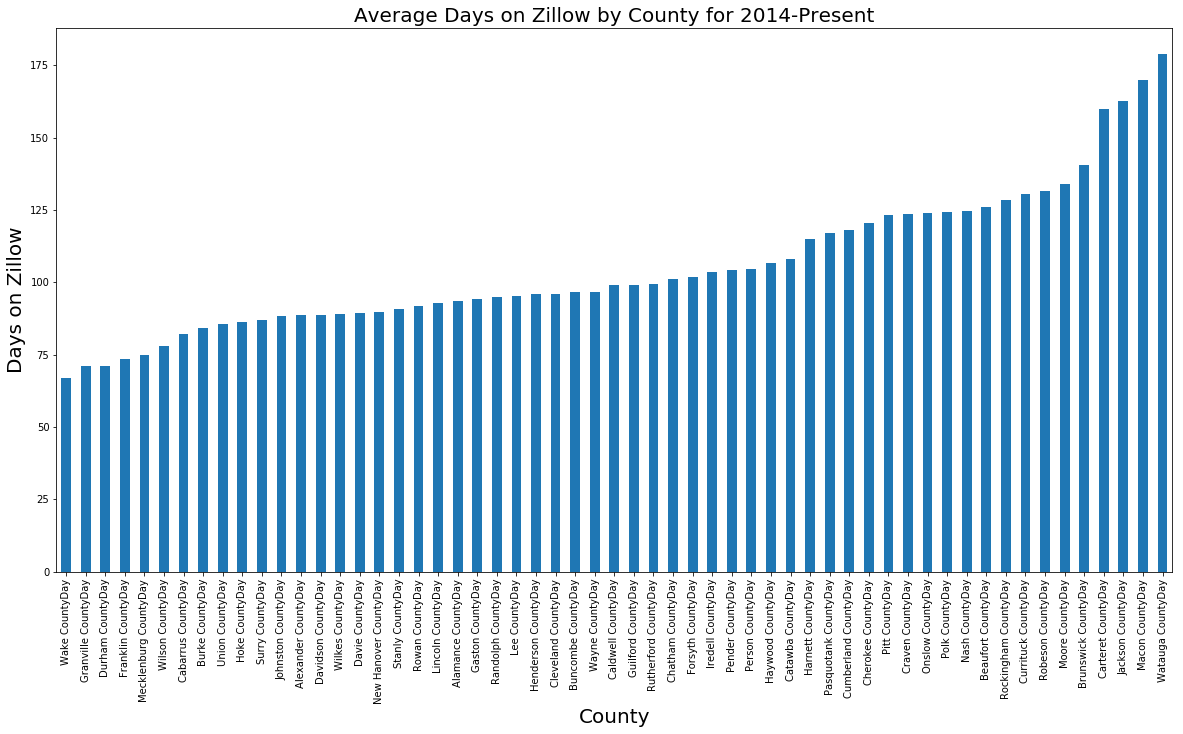

In [24]:
day_2014_mean = day_2014.mean()

day_2014_mean = day_2014_mean.sort_values(ascending=True)

day_2014_mean.plot('bar', figsize=(20,10))
plt.title('Average Days on Zillow by County for 2014-Present', fontsize=20)
plt.xlabel('County', fontsize=20)
plt.ylabel('Days on Zillow', fontsize=20)

In [25]:
day_2014_mean

Wake CountyDay            66.898438
Granville CountyDay       70.910714
Durham CountyDay          71.062500
Franklin CountyDay        73.500000
Mecklenburg CountyDay     74.968750
Wilson CountyDay          77.833333
Cabarrus CountyDay        81.984375
Burke CountyDay           84.250000
Union CountyDay           85.695312
Hoke CountyDay            86.333333
Surry CountyDay           87.000000
Johnston CountyDay        88.484375
Alexander CountyDay       88.500000
Davidson CountyDay        88.703704
Wilkes CountyDay          88.944444
Davie CountyDay           89.318182
New Hanover CountyDay     89.787234
Stanly CountyDay          90.673077
Rowan CountyDay           91.897727
Lincoln CountyDay         92.962500
Alamance CountyDay        93.441860
Gaston CountyDay          94.179688
Randolph CountyDay        94.936170
Lee CountyDay             95.264706
Henderson CountyDay       95.851064
Cleveland CountyDay       96.019231
Buncombe CountyDay        96.445312
Wayne CountyDay           96

In [26]:
day_2014_mean.nsmallest(n=5)

Wake CountyDay           66.898438
Granville CountyDay      70.910714
Durham CountyDay         71.062500
Franklin CountyDay       73.500000
Mecklenburg CountyDay    74.968750
dtype: float64

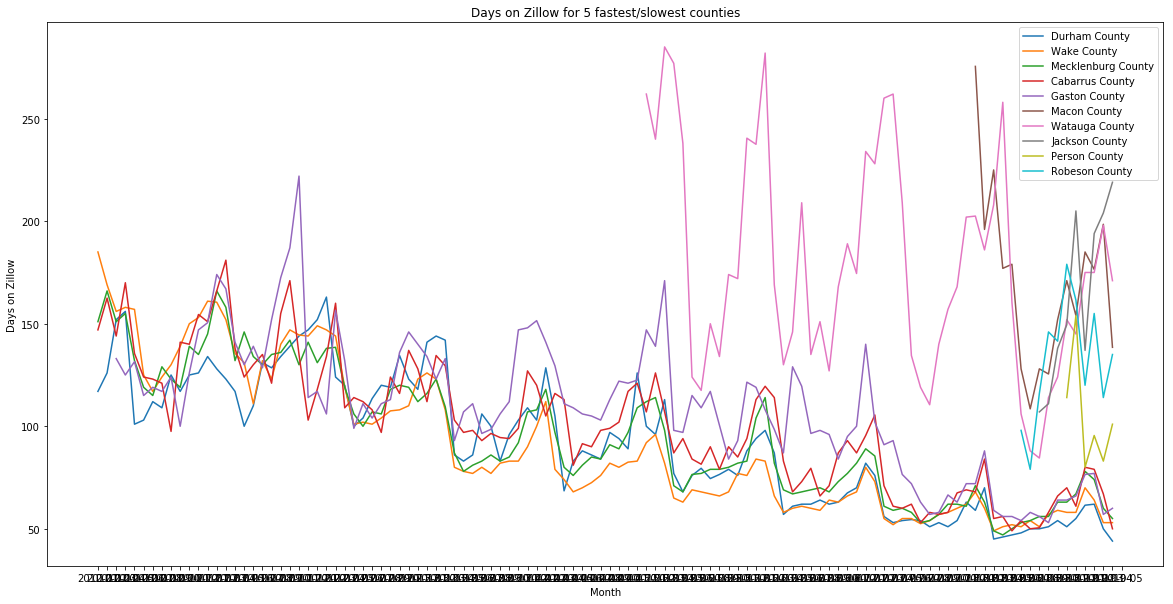

In [27]:
plt.figure(figsize=(20,10))

plt.plot(day_df['Durham CountyDay'], label='Durham County')
plt.plot(day_df['Wake CountyDay'], label='Wake County')
plt.plot(day_df['Mecklenburg CountyDay'], label='Mecklenburg County')
plt.plot(day_df['Cabarrus CountyDay'], label='Cabarrus County')
plt.plot(day_df['Gaston CountyDay'], label='Gaston County')
plt.plot(day_df['Macon CountyDay'], label='Macon County')
plt.plot(day_df['Watauga CountyDay'], label='Watauga County')
plt.plot(day_df['Jackson CountyDay'], label='Jackson County')
plt.plot(day_df['Person CountyDay'], label='Person County')
plt.plot(day_df['Robeson CountyDay'], label='Robeson County')

#plt.plot(day_df['mean'], label='Global')

plt.title('Days on Zillow for 5 fastest/slowest counties')
plt.xlabel('Month')
plt.ylabel('Days on Zillow')

plt.legend()

In [28]:
day_2014_mean.nlargest(n=5)

Watauga CountyDay      178.913462
Macon CountyDay        169.875000
Jackson CountyDay      162.722222
Carteret CountyDay     159.679245
Brunswick CountyDay    140.445312
dtype: float64

In [43]:
# Get mean of all counties
day_df['mean'] = day_df.mean(axis=1)

# Transfomr mean into rolling mean

day_df['rolling_mean'] = day_df['mean'].rolling(12).mean()

In [30]:
day_df.head()

,Mecklenburg CountyDay,Wake CountyDay,Guilford CountyDay,Forsyth CountyDay,Cumberland CountyDay,Durham CountyDay,Buncombe CountyDay,Gaston CountyDay,New Hanover CountyDay,Union CountyDay,...,Davie CountyDay,Pasquotank CountyDay,Jackson CountyDay,Person CountyDay,Alexander CountyDay,Macon CountyDay,Cherokee CountyDay,Currituck CountyDay,Polk CountyDay,mean
Date,,,,,,,,,,,,,,,,,,,,,
2010-01,151.0,185.0,155.0,172.5,143.0,117.0,NaN,NaN,NaN,171.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,155.187500
2010-02,166.0,169.0,160.0,196.0,91.0,126.0,NaN,NaN,NaN,203.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,159.187500
2010-03,151.0,156.0,153.0,188.0,107.0,152.0,NaN,133.0,NaN,184.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,152.055556
2010-04,155.0,158.0,166.0,231.0,133.0,156.0,NaN,125.0,NaN,222.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,168.444444
2010-05,132.0,157.0,160.0,186.0,110.0,101.0,NaN,131.5,NaN,210.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,147.000000


In [31]:
sales_2018 = sales_df.filter(regex='2018', axis=0)
price_2018 = price_df.filter(regex='2018', axis=0)

day_2018 = day_df.filter(regex='2018', axis=0)

sales_mean = sales_df.mean()
price_mean = price_df.mean()
day_mean = day_2014.mean()
day_mean.head()

Mecklenburg CountyDay     74.968750
Wake CountyDay            66.898438
Guilford CountyDay        99.164062
Forsyth CountyDay        101.867188
Cumberland CountyDay     117.968750
dtype: float64

In [45]:
day_df

,Mecklenburg CountyDay,Wake CountyDay,Guilford CountyDay,Forsyth CountyDay,Cumberland CountyDay,Durham CountyDay,Buncombe CountyDay,Gaston CountyDay,New Hanover CountyDay,Union CountyDay,...,Pasquotank CountyDay,Jackson CountyDay,Person CountyDay,Alexander CountyDay,Macon CountyDay,Cherokee CountyDay,Currituck CountyDay,Polk CountyDay,mean,rolling_mean
Date,,,,,,,,,,,,,,,,,,,,,
2010-01,151.0,185.0,155.0,172.5,143.0,117.0,NaN,NaN,NaN,171.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,155.187500,NaN
2010-02,166.0,169.0,160.0,196.0,91.0,126.0,NaN,NaN,NaN,203.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,159.187500,NaN
2010-03,151.0,156.0,153.0,188.0,107.0,152.0,NaN,133.0,NaN,184.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,152.055556,NaN
2010-04,155.0,158.0,166.0,231.0,133.0,156.0,NaN,125.0,NaN,222.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,168.444444,NaN
2010-05,132.0,157.0,160.0,186.0,110.0,101.0,NaN,131.5,NaN,210.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,147.000000,NaN
2010-06,119.0,125.0,124.0,127.5,102.0,103.0,NaN,115.0,NaN,125.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,118.277778,NaN
2010-07,115.0,117.0,125.0,134.0,107.5,112.0,177.5,119.0,NaN,124.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,125.400000,NaN
2010-08,129.0,124.0,121.5,134.0,108.0,109.0,129.5,117.0,NaN,145.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,122.090909,NaN
2010-09,123.0,130.0,133.0,158.0,122.0,125.0,166.0,124.0,NaN,134.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,130.681818,NaN


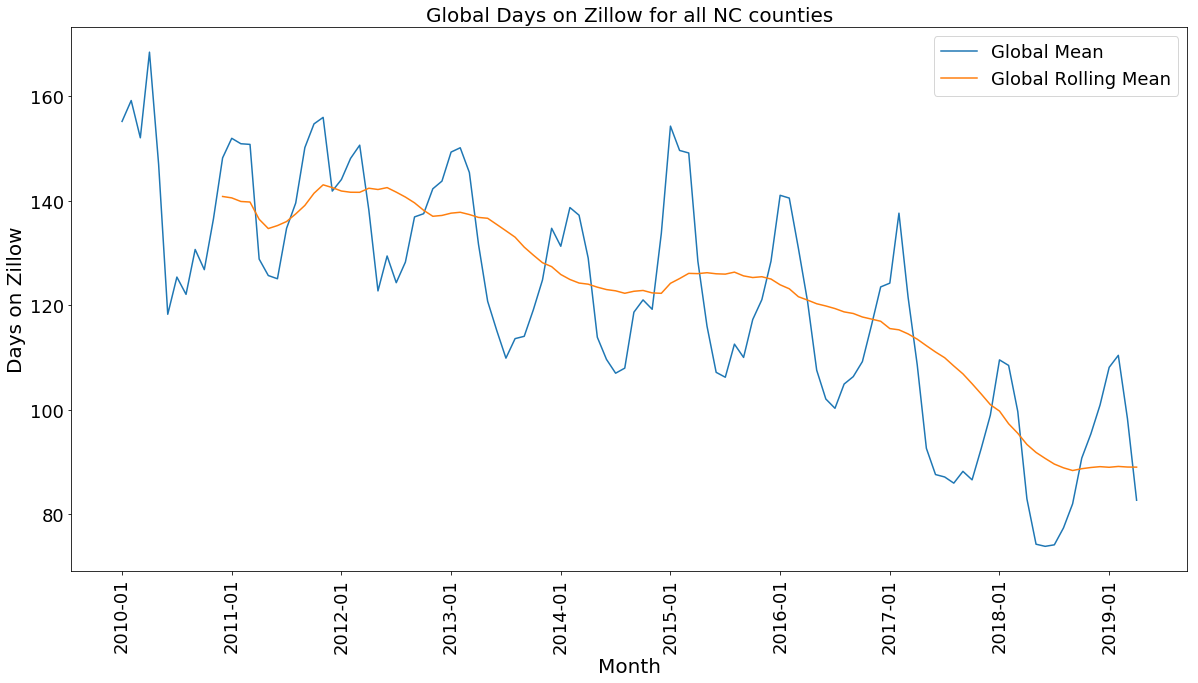

In [50]:
plt.figure(figsize=(20,10))

plt.plot(day_df['mean'], label='Global Mean')
plt.plot(day_df['rolling_mean'], label='Global Rolling Mean')

plt.title('Global Days on Zillow for all NC counties', fontsize=20)
plt.xlabel('Month', fontsize=20)
plt.xticks(day_df.index[::12], rotation='vertical', fontsize=18)
plt.ylabel('Days on Zillow', fontsize=20)
plt.yticks(fontsize=18)
plt.legend(fontsize=18)

# Generate smoothing trend line

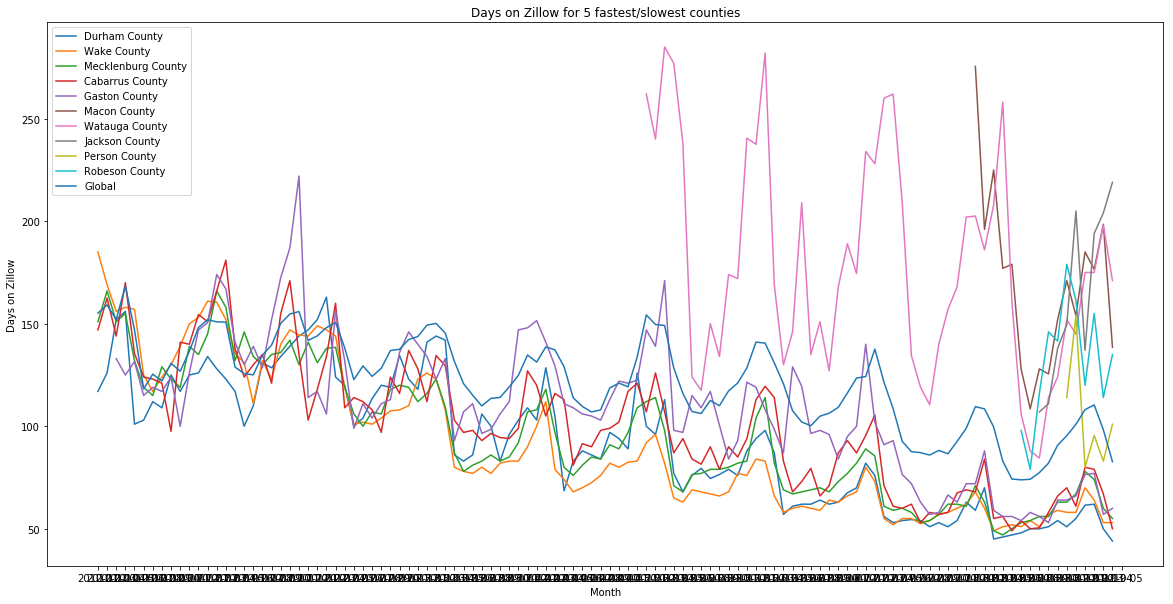

In [33]:
plt.figure(figsize=(20,10))

plt.plot(day_df['Durham CountyDay'], label='Durham County')
plt.plot(day_df['Wake CountyDay'], label='Wake County')
plt.plot(day_df['Mecklenburg CountyDay'], label='Mecklenburg County')
plt.plot(day_df['Cabarrus CountyDay'], label='Cabarrus County')
plt.plot(day_df['Gaston CountyDay'], label='Gaston County')
plt.plot(day_df['Macon CountyDay'], label='Macon County')
plt.plot(day_df['Watauga CountyDay'], label='Watauga County')
plt.plot(day_df['Jackson CountyDay'], label='Jackson County')
plt.plot(day_df['Person CountyDay'], label='Person County')
plt.plot(day_df['Robeson CountyDay'], label='Robeson County')

plt.plot(day_df['mean'], label='Global')

plt.title('Days on Zillow for 5 fastest/slowest counties')
plt.xlabel('Month')
plt.ylabel('Days on Zillow')

plt.legend()

In [34]:
# Conert series to dataframe
day_mean_df = pd.DataFrame({'Name':day_mean.index, 'Days':day_mean.values})

# Remoe extra alues from county descriptor
day_mean_df['Name'] = day_mean_df['Name'].str.replace(' CountyDay', '')

# Merge FIPS codes based on county name
day_mean_df = pd.merge(day_mean_df, fips_df, how='left', on='Name')

# Get rid of mean row
day_mean_df = day_mean_df[day_mean_df['Name'] != 'mean']

In [35]:
day_mean_df

,Name,Days,FIPS,State
0,Mecklenburg,74.968750,37119,NC
1,Wake,66.898438,37183,NC
2,Guilford,99.164062,37081,NC
3,Forsyth,101.867188,37067,NC
4,Cumberland,117.968750,37051,NC
5,Durham,71.062500,37063,NC
6,Buncombe,96.445312,37021,NC
7,Gaston,94.179688,37071,NC
8,New Hanover,89.787234,37129,NC
9,Union,85.695312,37179,NC


In [36]:
#!pip install geopandas==0.3.0
#!pip install pyshp==1.2.10
#!pip install shapely==1.6.3

fig = ff.create_choropleth(fips=day_mean_df['FIPS'], values=day_mean_df['Days'], scope=['NC'])
#py.iplot(fig, scope='NC')

py.iplot(fig, filename='choropleth_north_carolina')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~alex_chao/0 or inside your plot.ly account where it is named 'choropleth_north_carolina'


In [38]:
sales_2014 = sales_df.filter(regex='201[4-9]', axis=0)
price_2014 = price_df.filter(regex='201[4-9]', axis=0)

sales_mean = sales_2014.mean()
price_mean = price_2014.mean()


# Conert series to dataframe
sales_mean_df = pd.DataFrame({'Name':sales_mean.index, 'Sales':sales_mean.values})
price_mean_df = pd.DataFrame({'Name':price_mean.index, 'Price':price_mean.values})

# Remoe extra alues from county descriptor
sales_mean_df['Name'] = sales_mean_df['Name'].str.replace(' CountySale', '')
price_mean_df['Name'] = price_mean_df['Name'].str.replace(' CountyPrice', '')


# Merge FIPS codes based on county name
sales_mean_df = pd.merge(sales_mean_df, fips_df, how='left', on='Name')
price_mean_df = pd.merge(price_mean_df, fips_df, how='left', on='Name')

# Get rid of mean row
sales_mean_df = sales_mean_df[sales_mean_df['Name'] != 'mean']
price_mean_df = price_mean_df[price_mean_df['Name'] != 'mean']


In [41]:
fig = ff.create_choropleth(fips=sales_mean_df['FIPS'], values=sales_mean_df['Sales'], scope=['NC'])
#py.iplot(fig, scope='NC')

py.iplot(fig, filename='choropleth_north_carolina')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~alex_chao/0 or inside your plot.ly account where it is named 'choropleth_north_carolina'


In [40]:
fig = ff.create_choropleth(fips=price_mean_df['FIPS'], values=price_mean_df['Price'], scope=['NC'])
#py.iplot(fig, scope='NC')

py.iplot(fig, filename='choropleth_north_carolina')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~alex_chao/0 or inside your plot.ly account where it is named 'choropleth_north_carolina'
